In [1]:
from functions import *
from bayes_opt import BayesianOptimization

In [2]:
n=4
T=0.1
t_max=10
interpolator_kind='cubic'

In [3]:
def loss_ra(x1,x2,x3):
    '''
    Computes the negative average delta for multiple random Ising models 
    using for a given ramp-up schedule and maximum time.
    '''
    n_random_models = 1

    ramp_up_schedule = [x1,x2,x3]

    schedule = get_symmetric_schedule(ramp_up_schedule) # mirror and append the ramp up schedule
    schedule_interpolator = get_schedule_interpolator(schedule, kind=interpolator_kind) # get an interpolating function for the continuos schedule
    
    delta_sum = 0    
    for seed in range(n_random_models):
        m = RandomIsingModel(n=n, seed=seed)
        proposal_mat_ra = get_proposal_mat_ra(m, schedule_interpolator, t_max, assert_symmetry=False)
        P = get_transition_matrix(m, T, proposal_mat_ra)
        delta_sum += get_delta(P)
    
    delta_avg = delta_sum / n_random_models
    return delta_avg

In [4]:
pbounds = {'x1': (0,4), 'x2': (0,4), 'x3': (0,4)}

optimizer = BayesianOptimization(
    f=loss_ra,
    pbounds=pbounds,
    random_state=1,
)

In [5]:
optimizer.maximize(
    init_points=10,
    n_iter=1000,
)

|   iter    |  target   |    x1     |    x2     |    x3     |
-------------------------------------------------------------


| 1         | 0.003332  | 1.668     | 2.881     | 0.0004575 |
| 2         | 0.0019    | 1.209     | 0.587     | 0.3694    |


| 3         | 0.1109    | 0.745     | 1.382     | 1.587     |


| 4         | 0.0301    | 2.155     | 1.677     | 2.741     |


| 5         | 0.0682    | 0.8178    | 3.512     | 0.1096    |


| 6         | 0.1092    | 2.682     | 1.669     | 2.235     |
| 7         | 0.03253   | 0.5615    | 0.7924    | 3.203     |


| 8         | 0.08336   | 3.873     | 1.254     | 2.769     |


| 9         | 0.1011    | 3.506     | 3.578     | 0.3402    |
| 10        | 0.1009    | 0.1562    | 0.6793    | 3.513     |


| 11        | 0.03638   | 1.503     | 3.16      | 3.098     |


| 12        | 0.04534   | 2.129     | 3.15      | 0.6996    |


| 13        | 0.0001151 | 2.383     | 1.044     | 2.987     |


| 14        | 0.03595   | 0.9101    | 0.6224    | 3.789     |


| 15        | 0.03768   | 2.905     | 2.914     | 0.7788    |


| 16        | 0.07699   | 1.881     | 1.694     | 1.888     |


| 17        | 0.1189    | 3.822     | 2.656     | 1.883     |


| 18        | 0.1679    | 1.955     | 3.365     | 3.916     |


| 19        | 0.06571   | 1.29      | 3.054     | 3.428     |


| 20        | 0.0006004 | 3.42      | 2.877     | 3.648     |


| 21        | 0.09766   | 2.708     | 2.192     | 1.533     |


| 22        | 0.07317   | 0.563     | 0.5575    | 1.267     |


| 23        | 0.05496   | 1.096     | 3.057     | 0.2675    |


| 24        | 0.07826   | 3.757     | 3.8       | 1.117     |
| 25        | 0.1545    | 2.393     | 0.4508    | 0.4671    |


| 26        | 0.02109   | 2.454     | 2.23      | 2.614     |


| 27        | 0.03417   | 0.06725   | 1.033     | 3.202     |


| 28        | 0.08197   | 1.249     | 2.185     | 3.307     |


| 29        | 0.03621   | 1.856     | 0.5434    | 2.269     |


| 30        | 0.03704   | 3.646     | 2.491     | 3.877     |


| 31        | 0.09312   | 3.216     | 1.272     | 2.426     |


| 32        | 0.07151   | 0.9202    | 0.2591    | 2.815     |


| 33        | 0.1158    | 3.432     | 3.414     | 3.529     |


| 34        | 0.05889   | 2.394     | 0.4605    | 1.637     |


| 35        | 0.05523   | 3.357     | 1.674     | 1.184     |


| 36        | 0.05191   | 1.233     | 3.429     | 3.059     |


| 37        | 0.1129    | 3.839     | 2.693     | 1.871     |


| 38        | 0.05588   | 0.172     | 1.659     | 0.02117   |


| 39        | 0.03975   | 2.118     | 3.46      | 4.0       |


| 40        | 0.1603    | 1.926     | 3.414     | 3.97      |


| 41        | 0.07751   | 1.855     | 3.352     | 3.913     |


| 42        | 0.08878   | 0.4128    | 0.2286    | 1.479     |


| 43        | 0.0803    | 1.748     | 0.7739    | 0.3031    |


| 44        | 0.1456    | 2.015     | 3.35      | 3.963     |


| 45        | 0.1529    | 2.313     | 0.4879    | 0.4841    |


| 46        | 0.08854   | 2.349     | 0.5471    | 0.4118    |


| 47        | 0.1202    | 2.439     | 0.4691    | 0.6361    |


| 48        | 0.08134   | 2.297     | 0.3248    | 0.4791    |


| 49        | 0.08883   | 2.598     | 0.3795    | 0.5294    |


| 50        | 0.009123  | 1.019     | 3.382     | 0.5226    |


| 51        | 0.1035    | 3.019     | 0.9455    | 3.501     |


| 52        | 0.1637    | 1.989     | 3.378     | 3.835     |


| 53        | 0.09119   | 3.243     | 2.989     | 3.558     |


| 54        | 0.07958   | 2.271     | 0.328     | 0.4787    |


| 55        | 0.1327    | 2.024     | 3.45      | 3.869     |


| 56        | 0.08976   | 2.608     | 0.3835    | 0.5654    |


| 57        | 0.122     | 2.411     | 0.4936    | 0.6368    |


| 58        | 0.05325   | 3.21      | 1.244     | 2.427     |


| 59        | 0.1142    | 2.621     | 0.9972    | 2.571     |


| 60        | 0.1182    | 3.968     | 3.431     | 3.619     |


| 61        | 0.07772   | 2.02      | 3.314     | 3.869     |


| 62        | 0.06549   | 0.1688    | 2.631     | 3.965     |


| 63        | 0.133     | 1.986     | 3.476     | 3.797     |


| 64        | 0.08511   | 0.4346    | 3.262     | 3.899     |


| 65        | 0.08288   | 3.487     | 0.7144    | 1.675     |


| 66        | 0.08869   | 0.2876    | 0.6244    | 2.71      |


| 67        | 0.2123    | 2.378     | 0.3931    | 0.6353    |


| 68        | 0.1199    | 2.27      | 1.101     | 2.05      |


| 69        | 0.1494    | 1.944     | 3.426     | 3.878     |


| 70        | 0.1653    | 2.445     | 0.362     | 0.72      |


| 71        | 0.03892   | 0.06804   | 1.173     | 1.246     |


| 72        | 0.105     | 0.345     | 2.189     | 0.5801    |


| 73        | 0.1808    | 2.404     | 0.354     | 0.6013    |


| 74        | 0.1155    | 2.316     | 0.3363    | 0.5721    |


| 75        | 0.2189    | 2.33      | 0.4018    | 0.6336    |


| 76        | 0.1302    | 2.314     | 0.3536    | 0.7031    |


| 77        | 0.1847    | 2.374     | 0.3714    | 0.6698    |


| 78        | 0.1937    | 2.304     | 0.4476    | 0.6403    |


| 79        | 0.129     | 2.023     | 3.96      | 1.61      |


| 80        | 0.2069    | 2.36      | 0.4224    | 0.6713    |


| 81        | 0.1449    | 1.833     | 3.877     | 2.276     |


| 82        | 0.1032    | 3.265     | 1.444     | 2.399     |


| 83        | 0.01414   | 0.5379    | 3.755     | 0.03788   |


| 84        | 0.174     | 2.174     | 0.5028    | 0.5839    |


| 85        | 0.1271    | 0.7071    | 0.8369    | 2.122     |


| 86        | 0.06822   | 3.302     | 0.4796    | 2.233     |


| 87        | 0.1125    | 2.321     | 0.3492    | 0.7361    |


| 88        | 0.04008   | 2.046     | 2.843     | 3.732     |


| 89        | 0.1448    | 2.054     | 0.5428    | 0.6404    |


| 90        | 0.1497    | 3.324     | 3.361     | 2.15      |


| 91        | 0.09797   | 2.191     | 0.5921    | 0.6317    |


| 92        | 0.03956   | 3.17      | 0.5636    | 3.169     |


| 93        | 0.1977    | 2.135     | 0.4636    | 0.4586    |


| 94        | 0.1252    | 1.56      | 0.1412    | 0.6194    |


| 95        | 0.000207  | 0.1017    | 0.1445    | 0.1193    |


| 96        | 0.1933    | 2.186     | 0.4886    | 0.3838    |


| 97        | 0.1558    | 2.065     | 0.627     | 0.4537    |


| 98        | 0.1374    | 2.231     | 0.5179    | 0.4576    |


| 99        | 0.2108    | 2.085     | 0.5003    | 0.3753    |


| 100       | 0.2059    | 2.152     | 0.4149    | 0.6068    |


| 101       | 0.07061   | 2.155     | 0.4628    | 0.2091    |


| 102       | 0.2089    | 2.079     | 0.5093    | 0.5091    |


| 103       | 0.1289    | 2.556     | 0.3966    | 0.574     |


| 104       | 0.1413    | 1.896     | 0.4581    | 0.3583    |


| 105       | 0.05018   | 1.945     | 0.3549    | 0.5694    |


| 106       | 0.213     | 1.906     | 0.6301    | 0.4762    |


| 107       | 0.1871    | 1.902     | 0.5552    | 0.5271    |


| 108       | 0.1051    | 1.934     | 0.6056    | 0.3644    |


| 109       | 0.136     | 2.113     | 0.5333    | 0.4257    |


| 110       | 0.03608   | 1.18      | 0.03402   | 0.623     |


| 111       | 0.1202    | 2.103     | 0.3811    | 0.4594    |


| 112       | 0.01229   | 0.2252    | 2.693     | 3.472     |


| 113       | 0.0006268 | 1.952     | 0.7756    | 0.5169    |


| 114       | 0.2199    | 2.112     | 0.4517    | 0.5448    |


| 115       | 0.1885    | 1.97      | 0.5452    | 0.4363    |


| 116       | 0.1661    | 2.06      | 0.4611    | 0.3344    |


| 117       | 0.2106    | 2.081     | 0.4606    | 0.5867    |


| 118       | 0.1671    | 2.173     | 0.3853    | 0.5976    |


| 119       | 0.1446    | 2.581     | 0.8183    | 2.634     |


| 120       | 0.1748    | 1.771     | 0.5895    | 0.4928    |


| 121       | 0.02527   | 0.7045    | 0.7826    | 0.5532    |


| 122       | 0.01263   | 3.617     | 0.2148    | 0.5355    |


| 123       | 0.2199    | 2.037     | 0.4948    | 0.5373    |


| 124       | 0.1899    | 2.163     | 0.4199    | 0.6754    |


| 125       | 0.07417   | 1.65      | 0.5108    | 0.5784    |


| 126       | 0.133     | 3.4       | 3.347     | 2.008     |


| 127       | 0.1483    | 2.268     | 1.203     | 1.768     |


| 128       | 0.159     | 3.254     | 3.504     | 2.057     |


| 129       | 0.2343    | 1.823     | 0.653     | 0.4435    |


| 130       | 0.1753    | 1.994     | 0.5937    | 0.5289    |


| 131       | 0.1531    | 1.841     | 0.5652    | 0.3864    |


| 132       | 0.1864    | 1.817     | 0.6567    | 0.4866    |


| 133       | 0.1606    | 3.335     | 3.521     | 2.156     |


| 134       | 0.07397   | 0.1619    | 2.131     | 1.756     |


| 135       | 0.1586    | 1.909     | 3.903     | 3.638     |


| 136       | 0.1465    | 1.962     | 3.371     | 3.923     |


| 137       | 0.146     | 3.317     | 3.357     | 2.146     |


| 138       | 0.1617    | 1.879     | 0.4988    | 0.4894    |


| 139       | 0.1525    | 3.372     | 3.47      | 2.065     |


| 140       | 0.07503   | 1.915     | 3.351     | 3.787     |


| 141       | 0.09761   | 1.627     | 2.936     | 0.4179    |


| 142       | 0.1507    | 3.431     | 3.452     | 2.213     |


| 143       | 0.164     | 1.699     | 0.6639    | 0.4153    |


| 144       | 0.2023    | 2.028     | 0.4722    | 0.4516    |


| 145       | 0.05383   | 1.638     | 3.39      | 2.137     |


| 146       | 0.1422    | 3.344     | 3.44      | 2.297     |


| 147       | 0.00529   | 2.116     | 0.566     | 3.717     |


| 148       | 0.1021    | 3.178     | 3.452     | 2.198     |


| 149       | 0.1805    | 2.167     | 0.4943    | 0.5849    |


| 150       | 0.1694    | 2.118     | 0.4423    | 0.3566    |


| 151       | 0.1054    | 2.53      | 0.2813    | 0.7099    |


| 152       | 0.1399    | 1.807     | 3.821     | 3.688     |


| 153       | 0.04672   | 3.35      | 3.623     | 1.999     |


| 154       | 0.09031   | 1.968     | 3.27      | 3.974     |


| 155       | 0.1638    | 2.304     | 3.328     | 3.397     |


| 156       | 0.0933    | 1.865     | 3.805     | 3.538     |


| 157       | 0.03479   | 3.757     | 0.7062    | 0.9495    |


| 158       | 0.1095    | 1.833     | 3.284     | 1.195     |


| 159       | 0.00691   | 2.26      | 3.222     | 3.426     |


| 160       | 0.1647    | 1.777     | 0.6164    | 0.4297    |


| 161       | 0.1839    | 2.074     | 0.5695    | 0.3349    |


| 162       | 0.1308    | 2.426     | 3.318     | 3.396     |


| 163       | 0.1472    | 2.081     | 0.4061    | 0.6288    |


| 164       | 0.1424    | 2.319     | 3.421     | 3.371     |


| 165       | 0.1363    | 1.716     | 0.7711    | 0.4445    |


| 166       | 0.1352    | 1.955     | 3.892     | 3.724     |


| 167       | 0.1892    | 2.125     | 0.5075    | 0.3268    |


| 168       | 0.02558   | 1.853     | 3.976     | 3.639     |


| 169       | 0.2189    | 2.208     | 0.4415    | 0.6558    |


| 170       | 0.135     | 2.795     | 1.228     | 0.5228    |


| 171       | 0.19      | 1.997     | 0.871     | 1.015     |


| 172       | 0.1824    | 2.068     | 0.8507    | 1.023     |


| 173       | 0.05633   | 1.027     | 2.768     | 2.942     |


| 174       | 0.08169   | 0.9372    | 0.9373    | 2.573     |


| 175       | 0.1248    | 2.088     | 0.9384    | 1.027     |


| 176       | 0.1618    | 2.371     | 3.308     | 1.333     |


| 177       | 0.06794   | 2.077     | 0.7586    | 0.8865    |


| 178       | 0.2067    | 2.043     | 0.8078    | 1.087     |


| 179       | 0.1045    | 1.797     | 0.6896    | 0.3668    |


| 180       | 0.08814   | 1.947     | 3.334     | 3.911     |


| 181       | 0.06767   | 3.394     | 0.5905    | 1.9       |


| 182       | 0.2247    | 2.003     | 0.8288    | 1.12      |


| 183       | 0.182     | 1.903     | 0.8227    | 1.037     |


| 184       | 0.1737    | 1.969     | 0.7977    | 1.025     |


| 185       | 0.1387    | 1.964     | 0.899     | 1.175     |


| 186       | 0.1928    | 2.051     | 0.8438    | 1.198     |


| 187       | 0.1428    | 2.023     | 0.8913    | 1.149     |


| 188       | 0.1275    | 3.701     | 2.967     | 2.149     |


| 189       | 0.1638    | 1.979     | 0.5376    | 0.6071    |


| 190       | 0.2197    | 2.013     | 0.7889    | 1.187     |


| 191       | 0.1334    | 2.015     | 0.7161    | 1.145     |


| 192       | 0.02479   | 0.05554   | 2.984     | 0.3474    |


| 193       | 0.1682    | 1.922     | 0.7851    | 1.085     |


| 194       | 0.2133    | 2.077     | 0.811     | 1.142     |


| 195       | 0.03156   | 1.356     | 1.263     | 1.453     |


| 196       | 0.1802    | 2.048     | 0.5518    | 0.5553    |


| 197       | 0.1639    | 1.92      | 0.907     | 1.008     |


| 198       | 0.1686    | 2.185     | 0.8489    | 1.16      |


| 199       | 0.1861    | 1.965     | 0.7637    | 1.265     |


| 200       | 0.111     | 1.313     | 1.672     | 0.2846    |


| 201       | 0.08942   | 0.5127    | 0.1439    | 1.326     |


| 202       | 0.1058    | 2.095     | 0.8137    | 1.342     |


| 203       | 0.2129    | 2.105     | 0.7273    | 1.217     |


| 204       | 0.1574    | 1.915     | 0.6186    | 0.5501    |


| 205       | 0.2057    | 2.086     | 0.494     | 0.383     |


| 206       | 0.2135    | 1.914     | 0.5647    | 0.4511    |


| 207       | 0.1656    | 2.22      | 0.7737    | 1.227     |


| 208       | 0.07937   | 2.075     | 0.6254    | 1.306     |


| 209       | 0.1148    | 3.901     | 1.887     | 2.797     |


| 210       | 0.1764    | 1.836     | 0.5929    | 0.4645    |


| 211       | 0.1609    | 2.204     | 0.7157    | 1.109     |


| 212       | 0.09517   | 1.249     | 3.213     | 0.6086    |


| 213       | 0.1715    | 2.267     | 0.467     | 0.7107    |


| 214       | 0.1791    | 1.845     | 0.826     | 1.24      |


| 215       | 0.1333    | 1.838     | 0.8902    | 1.192     |


| 216       | 0.1077    | 1.877     | 0.8803    | 1.305     |


| 217       | 0.2005    | 2.164     | 0.7687    | 1.168     |


| 218       | 0.1396    | 1.701     | 0.6954    | 0.5471    |


| 219       | 0.1811    | 1.947     | 0.4862    | 0.4856    |


| 220       | 0.176     | 2.192     | 0.4813    | 0.6534    |


| 221       | 0.0243    | 1.0       | 0.9378    | 3.262     |


| 222       | 0.1995    | 1.934     | 0.8016    | 1.161     |


| 223       | 0.2057    | 2.245     | 0.4357    | 0.5687    |


| 224       | 0.1404    | 2.153     | 0.6683    | 1.183     |


| 225       | 0.008053  | 2.5       | 0.5144    | 2.678     |


| 226       | 0.2116    | 2.106     | 0.7922    | 1.196     |


| 227       | 0.1343    | 1.771     | 0.8386    | 1.035     |


| 228       | 0.1465    | 1.988     | 3.857     | 3.592     |


| 229       | 0.04918   | 0.5086    | 0.2601    | 1.749     |


| 230       | 0.1872    | 2.123     | 0.828     | 1.098     |


| 231       | 0.218     | 2.158     | 0.4182    | 0.5957    |


| 232       | 0.02167   | 0.2804    | 3.899     | 1.618     |


| 233       | 1.18e-05  | 1.04      | 0.8635    | 2.459     |


| 234       | 0.1584    | 1.794     | 0.762     | 1.289     |


| 235       | 0.08995   | 1.85      | 0.7169    | 1.21      |


| 236       | 0.06457   | 0.2037    | 1.208     | 0.4034    |


| 237       | 0.1539    | 2.358     | 0.8275    | 1.134     |


| 238       | 0.1619    | 2.209     | 0.8247    | 1.039     |


| 239       | 0.1636    | 1.972     | 0.8403    | 1.247     |


| 240       | 0.1348    | 1.888     | 0.8316    | 0.9296    |


| 241       | 0.1518    | 1.587     | 0.7266    | 0.43      |


| 242       | 0.06633   | 2.341     | 3.434     | 1.335     |


| 243       | 0.1755    | 2.323     | 3.336     | 3.282     |


| 244       | 0.2272    | 2.058     | 0.7701    | 1.197     |


| 245       | 0.1477    | 2.282     | 3.368     | 3.156     |


| 246       | 0.1399    | 2.343     | 3.279     | 1.429     |


| 247       | 0.04653   | 2.641     | 0.1054    | 1.989     |


| 248       | 0.06005   | 0.8235    | 2.489     | 3.215     |


| 249       | 0.09368   | 1.598     | 0.603     | 0.3989    |


| 250       | 0.05378   | 2.41      | 3.241     | 1.275     |


| 251       | 0.1534    | 2.371     | 3.443     | 3.213     |


| 252       | 0.07185   | 0.6735    | 1.492     | 1.828     |


| 253       | 0.007473  | 2.396     | 3.271     | 3.142     |


| 254       | 0.1664    | 0.4683    | 3.104     | 3.073     |


| 255       | 0.2283    | 2.002     | 0.5312    | 0.4971    |


| 256       | 0.07138   | 0.4115    | 3.179     | 2.993     |


| 257       | 0.1661    | 2.098     | 0.7504    | 1.075     |


| 258       | 0.0174    | 0.9257    | 1.269     | 2.739     |


| 259       | 0.1024    | 2.182     | 1.838     | 3.707     |


| 260       | 0.1186    | 2.207     | 3.454     | 3.233     |


| 261       | 0.149     | 0.527     | 3.056     | 3.182     |


| 262       | 0.1345    | 2.152     | 0.4366    | 0.8224    |


| 263       | 0.03474   | 0.502     | 3.002     | 3.065     |


| 264       | 0.03991   | 0.5333    | 3.25      | 3.217     |


| 265       | 0.1166    | 2.401     | 0.7818    | 0.9841    |


| 266       | 0.02157   | 0.8156    | 3.616     | 0.5894    |


| 267       | 0.168     | 2.238     | 3.353     | 3.313     |


| 268       | 0.1458    | 3.424     | 3.315     | 2.237     |


| 269       | 0.008989  | 2.18      | 0.3461    | 1.816     |


| 270       | 0.08583   | 3.922     | 1.896     | 0.4897    |


| 271       | 0.1864    | 0.4102    | 3.106     | 3.16      |


| 272       | 0.1071    | 2.329     | 0.8266    | 1.242     |


| 273       | 0.1214    | 2.088     | 3.292     | 4.0       |


| 274       | 0.1174    | 0.4365    | 3.049     | 3.199     |


| 275       | 0.01255   | 0.3348    | 3.185     | 3.117     |


| 276       | 0.222     | 1.961     | 0.8441    | 1.099     |


| 277       | 0.1113    | 3.026     | 1.041     | 3.358     |


| 278       | 0.1606    | 1.683     | 0.836     | 1.294     |


| 279       | 0.1089    | 3.476     | 3.375     | 2.123     |


| 280       | 0.1262    | 1.66      | 0.7829    | 1.22      |


| 281       | 0.1366    | 2.358     | 1.114     | 1.78      |


| 282       | 0.02618   | 3.958     | 3.736     | 0.2208    |


| 283       | 0.1299    | 2.329     | 0.9058    | 1.055     |


| 284       | 0.1072    | 1.621     | 0.8735    | 1.384     |


| 285       | 0.1057    | 1.597     | 0.7282    | 0.1271    |


| 286       | 0.1223    | 1.93      | 3.785     | 3.678     |


| 287       | 0.01642   | 2.386     | 1.272     | 1.755     |


| 288       | 0.093     | 3.206     | 3.383     | 1.966     |


| 289       | 0.1243    | 2.169     | 1.158     | 1.805     |


| 290       | 0.0756    | 2.447     | 0.4432    | 0.8618    |


| 291       | 0.04003   | 1.653     | 1.265     | 0.5985    |


| 292       | 0.1039    | 2.251     | 1.102     | 1.686     |


| 293       | 0.1921    | 2.353     | 0.4437    | 0.5465    |


| 294       | 0.09008   | 2.532     | 3.342     | 1.151     |


| 295       | 0.1467    | 2.277     | 1.829     | 2.872     |


| 296       | 0.07206   | 3.395     | 3.573     | 2.26      |


| 297       | 0.04983   | 1.826     | 3.532     | 3.971     |


| 298       | 0.185     | 2.089     | 0.75      | 1.274     |


| 299       | 0.07956   | 3.902     | 1.112     | 0.3798    |


| 300       | 0.05309   | 2.127     | 1.342     | 0.01954   |


| 301       | 0.08095   | 1.532     | 2.984     | 2.818     |


| 302       | 0.1274    | 3.306     | 3.306     | 2.292     |


| 303       | 0.1992    | 2.043     | 0.7328    | 1.222     |


| 304       | 0.1619    | 2.252     | 0.7868    | 1.123     |


| 305       | 0.1218    | 2.104     | 0.6785    | 0.3295    |


| 306       | 0.2066    | 2.213     | 0.4562    | 0.5368    |


| 307       | 0.09633   | 3.47      | 3.333     | 2.379     |


| 308       | 0.1551    | 1.883     | 0.8984    | 1.092     |


| 309       | 0.08882   | 1.555     | 0.8003    | 0.5422    |


| 310       | 0.04328   | 2.691     | 1.007     | 1.009     |


| 311       | 0.005144  | 0.4813    | 3.154     | 3.135     |


| 312       | 0.1247    | 0.7598    | 1.525     | 1.782     |


| 313       | 0.01751   | 1.432     | 3.295     | 3.216     |


| 314       | 0.03905   | 2.85      | 0.5146    | 0.8118    |


| 315       | 0.1284    | 2.335     | 1.856     | 2.991     |


| 316       | 0.2155    | 2.198     | 0.4385    | 0.6082    |


| 317       | 0.148     | 1.717     | 0.7474    | 1.376     |


| 318       | 0.1924    | 2.193     | 0.4199    | 0.4948    |


| 319       | 0.2359    | 1.855     | 0.6421    | 0.447     |


| 320       | 0.108     | 2.256     | 1.931     | 2.792     |


| 321       | 0.1694    | 1.913     | 0.7907    | 1.084     |


| 322       | 0.003223  | 3.701     | 3.108     | 2.419     |


| 323       | 0.09201   | 0.8012    | 2.877     | 1.154     |


| 324       | 0.0251    | 1.718     | 3.12      | 3.617     |


| 325       | 0.01425   | 2.2       | 3.313     | 3.191     |


| 326       | 0.1363    | 1.687     | 3.898     | 2.316     |


| 327       | 0.1861    | 2.039     | 0.7948    | 1.252     |


| 328       | 0.02173   | 0.2332    | 1.842     | 1.697     |


| 329       | 0.1152    | 2.213     | 3.402     | 3.431     |


| 330       | 0.1696    | 1.856     | 0.7081    | 0.438     |


| 331       | 0.05332   | 3.883     | 3.363     | 1.214     |


| 332       | 0.1042    | 2.262     | 3.457     | 3.111     |


| 333       | 0.06721   | 1.756     | 3.781     | 2.245     |


| 334       | 0.03368   | 1.801     | 3.981     | 2.434     |


| 335       | 0.1002    | 1.971     | 3.879     | 2.217     |


| 336       | 0.2079    | 2.01      | 0.8401    | 1.076     |


| 337       | 0.1076    | 0.4185    | 3.063     | 3.075     |


| 338       | 0.1428    | 1.957     | 3.472     | 3.133     |


| 339       | 0.1351    | 1.811     | 3.479     | 3.129     |


| 340       | 0.168     | 3.144     | 3.784     | 1.124     |


| 341       | 0.08668   | 3.237     | 3.867     | 1.106     |


| 342       | 0.03983   | 3.511     | 0.9334    | 2.454     |


| 343       | 0.07701   | 1.535     | 1.104     | 3.748     |


| 344       | 0.1695    | 3.115     | 3.712     | 1.148     |


| 345       | 0.08835   | 3.071     | 1.139     | 0.1244    |


| 346       | 0.2016    | 3.038     | 3.776     | 1.109     |


| 347       | 0.005264  | 1.53      | 0.3103    | 3.957     |


| 348       | 0.02453   | 1.189     | 0.2504    | 3.907     |


| 349       | 0.05438   | 2.974     | 2.589     | 2.281     |


| 350       | 0.1673    | 3.053     | 3.796     | 1.19      |


| 351       | 0.1546    | 1.902     | 3.895     | 3.651     |


| 352       | 0.0571    | 0.3581    | 0.9297    | 1.956     |


| 353       | 0.1809    | 3.057     | 3.778     | 0.9372    |


| 354       | 0.05575   | 0.6215    | 1.814     | 2.66      |


| 355       | 0.04044   | 3.952     | 3.525     | 1.712     |


| 356       | 0.1096    | 2.974     | 3.854     | 1.107     |


| 357       | 0.1937    | 3.135     | 3.794     | 0.8908    |


| 358       | 0.1308    | 3.241     | 3.757     | 0.7822    |


| 359       | 0.1043    | 3.135     | 3.849     | 0.9454    |


| 360       | 0.06683   | 2.714     | 2.038     | 3.229     |


| 361       | 0.1589    | 3.452     | 2.341     | 0.8417    |


| 362       | 0.07264   | 3.145     | 3.692     | 0.9444    |


| 363       | 0.1731    | 3.036     | 3.829     | 0.8917    |


| 364       | 0.0001618 | 3.499     | 2.527     | 1.766     |


| 365       | 0.089     | 3.074     | 3.677     | 0.7914    |


| 366       | 0.009278  | 0.3151    | 1.536     | 0.3154    |


| 367       | 0.07      | 3.517     | 2.224     | 0.8471    |


| 368       | 0.09362   | 2.933     | 3.8       | 0.8356    |


| 369       | 0.165     | 1.353     | 3.06      | 2.586     |


| 370       | 0.06457   | 0.7711    | 2.864     | 2.671     |


| 371       | 0.004372  | 1.396     | 3.147     | 2.652     |


| 372       | 0.08601   | 1.255     | 2.941     | 2.67      |


| 373       | 0.0937    | 3.005     | 3.702     | 1.127     |


| 374       | 0.1739    | 3.06      | 3.806     | 1.059     |


| 375       | 0.01302   | 2.63      | 1.573     | 1.87      |


| 376       | 0.219     | 3.396     | 2.425     | 0.8026    |


| 377       | 0.1812    | 3.365     | 2.4       | 0.8724    |


| 378       | 0.1656    | 3.722     | 3.717     | 3.561     |


| 379       | 0.1092    | 1.298     | 3.006     | 2.515     |


| 380       | 0.216     | 3.495     | 2.408     | 0.7681    |


| 381       | 0.1662    | 3.353     | 2.396     | 0.6855    |


| 382       | 0.0268    | 2.581     | 3.583     | 0.9873    |


| 383       | 0.1591    | 3.349     | 2.379     | 0.7792    |


| 384       | 0.0876    | 1.509     | 1.322     | 3.333     |


| 385       | 0.1282    | 3.465     | 2.461     | 0.8252    |


| 386       | 0.05088   | 3.431     | 2.319     | 0.6623    |


| 387       | 0.2027    | 3.429     | 2.444     | 0.7305    |


| 388       | 0.03136   | 3.6       | 3.683     | 3.571     |


| 389       | 0.1151    | 0.6549    | 0.4069    | 2.394     |


| 390       | 0.1305    | 3.164     | 3.828     | 0.8107    |


| 391       | 0.1879    | 3.819     | 3.743     | 3.554     |


| 392       | 0.2279    | 3.293     | 2.452     | 0.7138    |


| 393       | 0.08891   | 3.371     | 2.524     | 0.6739    |


| 394       | 0.1692    | 3.17      | 2.454     | 0.7582    |


| 395       | 0.2241    | 3.221     | 2.5       | 0.6704    |


| 396       | 0.1714    | 3.281     | 2.502     | 0.7438    |


| 397       | 0.1617    | 3.197     | 2.416     | 0.6922    |


| 398       | 0.02356   | 3.406     | 0.9084    | 2.379     |


| 399       | 0.06259   | 1.074     | 2.224     | 3.262     |


| 400       | 0.1954    | 3.758     | 3.796     | 3.541     |


| 401       | 0.08619   | 0.7181    | 3.337     | 1.562     |


| 402       | 0.2273    | 3.165     | 2.49      | 0.6471    |


| 403       | 0.159     | 3.198     | 2.488     | 0.5417    |


| 404       | 0.2022    | 3.35      | 2.454     | 0.7652    |


| 405       | 0.1118    | 3.864     | 3.864     | 3.425     |


| 406       | 0.08454   | 3.147     | 2.603     | 0.6628    |


| 407       | 0.03707   | 0.07264   | 1.761     | 2.328     |


| 408       | 0.08043   | 0.816     | 1.99      | 0.5068    |


| 409       | 0.04022   | 3.094     | 2.4       | 0.6101    |


| 410       | 0.02557   | 1.635     | 0.05073   | 3.945     |


| 411       | 0.1207    | 3.833     | 3.821     | 3.583     |


| 412       | 0.04695   | 3.658     | 1.353     | 0.5774    |


| 413       | 0.1934    | 3.542     | 2.449     | 0.6706    |


| 414       | 0.2162    | 3.605     | 2.372     | 0.6387    |


| 415       | 0.1695    | 3.701     | 2.318     | 0.5922    |


| 416       | 0.1016    | 2.878     | 3.065     | 0.5688    |


| 417       | 0.1655    | 3.263     | 2.428     | 0.7649    |


| 418       | 0.1478    | 3.668     | 2.412     | 0.7875    |


| 419       | 0.0653    | 0.8525    | 1.469     | 3.456     |


| 420       | 0.1564    | 3.65      | 2.433     | 0.6538    |


| 421       | 0.02805   | 3.774     | 3.645     | 3.502     |


| 422       | 0.04543   | 0.2372    | 3.814     | 3.843     |


| 423       | 0.2275    | 3.286     | 2.458     | 0.6416    |


| 424       | 0.02455   | 3.59      | 2.232     | 0.5601    |


| 425       | 0.05523   | 3.247     | 2.392     | 0.5531    |


| 426       | 0.08278   | 0.8038    | 1.691     | 3.721     |


| 427       | 0.1286    | 3.231     | 2.551     | 0.6153    |


| 428       | 0.04837   | 0.6633    | 3.41      | 0.545     |


| 429       | 0.1604    | 3.499     | 2.371     | 0.7124    |


| 430       | 0.2225    | 3.586     | 2.392     | 0.7223    |


| 431       | 0.1466    | 3.706     | 2.293     | 0.7198    |


| 432       | 0.1846    | 3.646     | 2.426     | 0.4911    |


| 433       | 0.2011    | 3.589     | 2.383     | 0.8154    |


| 434       | 0.1138    | 3.331     | 2.487     | 0.8659    |


| 435       | 0.06187   | 0.4449    | 2.111     | 3.29      |


| 436       | 0.1557    | 3.584     | 2.391     | 0.5085    |


| 437       | 0.2319    | 3.162     | 2.5       | 0.6998    |


| 438       | 0.1591    | 1.989     | 0.538     | 0.6133    |


| 439       | 0.1697    | 3.646     | 2.342     | 0.6835    |


| 440       | 0.2006    | 3.764     | 2.397     | 0.5498    |


| 441       | 0.1385    | 3.715     | 2.343     | 0.4603    |


| 442       | 0.06514   | 0.3906    | 3.47      | 2.887     |


| 443       | 0.1457    | 3.798     | 2.269     | 0.5819    |


| 444       | 0.06169   | 3.78      | 2.531     | 0.5485    |


| 445       | 0.2111    | 3.83      | 2.349     | 0.5768    |


| 446       | 0.1253    | 2.39      | 0.6224    | 1.15      |


| 447       | 0.225     | 3.252     | 2.462     | 0.6886    |


| 448       | 0.1132    | 3.916     | 2.39      | 0.5287    |


| 449       | 0.07679   | 2.267     | 1.221     | 1.776     |


| 450       | 0.1651    | 3.592     | 2.349     | 0.7566    |


| 451       | 0.05284   | 3.59      | 2.522     | 0.7452    |


| 452       | 0.1259    | 2.266     | 1.133     | 1.783     |


| 453       | 0.0409    | 2.02      | 3.118     | 0.8608    |


| 454       | 0.1672    | 3.751     | 2.407     | 0.6332    |


| 455       | 0.2336    | 3.913     | 2.298     | 0.6952    |


| 456       | 0.1682    | 1.993     | 3.103     | 3.222     |


| 457       | 0.1383    | 3.92      | 2.252     | 0.7834    |


| 458       | 0.2188    | 3.923     | 2.326     | 0.6593    |


| 459       | 0.1278    | 3.84      | 2.23      | 0.7132    |


| 460       | 0.1185    | 1.064     | 2.412     | 2.762     |


| 461       | 0.2004    | 3.968     | 2.325     | 0.6921    |


| 462       | 0.03931   | 2.889     | 0.3417    | 3.172     |


| 463       | 0.05427   | 2.849     | 1.686     | 2.601     |


| 464       | 0.08666   | 3.865     | 2.424     | 0.7962    |


| 465       | 0.03347   | 1.926     | 3.017     | 3.204     |


| 466       | 0.2124    | 3.07      | 2.502     | 0.7101    |


| 467       | 0.09983   | 2.846     | 3.749     | 0.8011    |


| 468       | 0.2041    | 3.018     | 2.513     | 0.6913    |


| 469       | 0.1914    | 2.982     | 2.549     | 0.7863    |


| 470       | 0.01468   | 2.086     | 2.041     | 0.1225    |


| 471       | 0.1423    | 3.457     | 2.464     | 2.748     |


| 472       | 0.1499    | 1.692     | 1.369     | 1.435     |


| 473       | 0.1621    | 3.019     | 2.478     | 0.8144    |


| 474       | 0.08522   | 2.057     | 3.112     | 3.317     |


| 475       | 0.1275    | 2.971     | 3.201     | 2.169     |


| 476       | 0.07008   | 1.07      | 1.112     | 2.314     |


| 477       | 0.1454    | 3.322     | 3.357     | 2.133     |


| 478       | 0.02674   | 3.552     | 3.296     | 0.4471    |


| 479       | 0.136     | 3.886     | 2.382     | 0.628     |


| 480       | 0.08575   | 0.5411    | 1.551     | 2.696     |


| 481       | 0.1489    | 2.442     | 0.9562    | 0.7822    |


| 482       | 0.06458   | 3.036     | 2.636     | 0.7748    |


| 483       | 0.1614    | 3.938     | 2.22      | 0.6737    |


| 484       | 0.02065   | 0.165     | 3.176     | 0.6183    |


| 485       | 0.1287    | 3.296     | 3.069     | 3.501     |


| 486       | 0.006171  | 1.558     | 2.987     | 1.667     |


| 487       | 0.1104    | 2.885     | 2.589     | 0.8843    |


| 488       | 0.1581    | 3.981     | 2.245     | 0.5513    |


| 489       | 0.1705    | 3.627     | 2.322     | 0.915     |


| 490       | 0.1044    | 3.584     | 2.511     | 0.473     |


| 491       | 0.2177    | 3.898     | 2.318     | 0.5861    |


| 492       | 0.1285    | 3.532     | 2.406     | 0.941     |


| 493       | 0.0977    | 1.832     | 2.667     | 2.076     |


| 494       | 0.1689    | 2.878     | 2.511     | 0.7781    |


| 495       | 0.0607    | 0.6694    | 1.594     | 2.151     |


| 496       | 0.109     | 2.935     | 2.474     | 0.6952    |


| 497       | 0.2303    | 3.11      | 2.503     | 0.6619    |


| 498       | 0.2215    | 3.883     | 2.306     | 0.6098    |


| 499       | 0.00845   | 0.6983    | 1.799     | 1.863     |


| 500       | 0.1367    | 0.2643    | 2.609     | 2.664     |


| 501       | 0.1981    | 3.639     | 2.393     | 0.5725    |


| 502       | 0.09838   | 3.88      | 2.255     | 0.4587    |


| 503       | 0.2111    | 3.795     | 3.736     | 3.702     |


| 504       | 0.02361   | 3.566     | 2.139     | 1.724     |


| 505       | 0.1282    | 3.696     | 3.835     | 3.633     |


| 506       | 0.1533    | 3.79      | 3.656     | 3.796     |


| 507       | 0.04049   | 2.198     | 1.74      | 1.616     |


| 508       | 0.1935    | 3.82      | 3.731     | 3.743     |


| 509       | 0.1573    | 3.809     | 3.677     | 3.664     |


| 510       | 0.1603    | 3.732     | 3.763     | 3.782     |


| 511       | 0.03472   | 3.569     | 1.526     | 3.641     |


| 512       | 0.04485   | 2.279     | 3.174     | 2.334     |


| 513       | 0.1074    | 3.662     | 2.412     | 0.9106    |


| 514       | 0.02115   | 3.09      | 3.973     | 0.1326    |


| 515       | 0.1859    | 3.75      | 3.725     | 3.687     |


| 516       | 0.03982   | 2.242     | 1.77      | 1.825     |


| 517       | 0.07885   | 1.987     | 3.188     | 3.092     |


| 518       | 0.07714   | 1.752     | 3.826     | 1.869     |


| 519       | 0.2102    | 3.546     | 2.429     | 0.5858    |


| 520       | 0.07269   | 3.84      | 3.849     | 3.813     |


| 521       | 0.2002    | 2.97      | 2.595     | 0.6553    |


| 522       | 0.07678   | 3.015     | 2.649     | 0.5775    |


| 523       | 0.07983   | 2.834     | 2.65      | 0.7608    |


| 524       | 0.2168    | 3.862     | 2.338     | 0.6816    |


| 525       | 0.171     | 3.163     | 3.749     | 1.25      |


| 526       | 0.1541    | 3.236     | 3.654     | 1.296     |


| 527       | 0.1597    | 3.682     | 2.272     | 0.9795    |


| 528       | 0.1273    | 2.103     | 2.638     | 2.275     |


| 529       | 0.08055   | 3.182     | 3.628     | 1.186     |


| 530       | 0.1899    | 3.991     | 3.864     | 2.88      |


| 531       | 0.01736   | 1.571     | 0.6005    | 2.833     |


| 532       | 0.01841   | 0.2932    | 0.3159    | 1.771     |


| 533       | 0.2006    | 3.528     | 2.45      | 0.6612    |


| 534       | 0.01172   | 3.983     | 3.758     | 2.839     |


| 535       | 0.06312   | 3.353     | 3.745     | 1.343     |


| 536       | 0.1192    | 3.9       | 3.977     | 2.886     |


| 537       | 0.1524    | 2.011     | 3.349     | 3.956     |


| 538       | 0.1507    | 3.492     | 2.483     | 0.5691    |


| 539       | 0.06645   | 0.5562    | 1.531     | 0.042     |


| 540       | 0.1981    | 2.927     | 2.573     | 0.7366    |


| 541       | 0.03794   | 1.22      | 0.03735   | 3.935     |


| 542       | 0.2131    | 3.954     | 3.867     | 3.009     |


| 543       | 0.08328   | 2.646     | 1.432     | 0.2151    |


| 544       | 0.1968    | 3.909     | 3.724     | 3.673     |


| 545       | 0.02904   | 2.602     | 2.113     | 2.515     |


| 546       | 0.1908    | 3.885     | 3.876     | 2.946     |


| 547       | 0.08465   | 3.957     | 3.947     | 3.11      |


| 548       | 0.1859    | 3.951     | 3.74      | 3.59      |


| 549       | 0.03119   | 2.16      | 0.1099    | 3.533     |


| 550       | 0.03821   | 3.891     | 3.772     | 2.999     |


| 551       | 0.1776    | 3.885     | 3.9       | 3.027     |


| 552       | 0.09962   | 3.134     | 3.645     | 1.377     |


| 553       | 0.1972    | 2.948     | 3.904     | 3.917     |


| 554       | 0.06753   | 3.895     | 2.965     | 1.286     |


| 555       | 0.1649    | 3.02      | 3.836     | 3.922     |


| 556       | 0.1113    | 3.044     | 3.944     | 3.927     |


| 557       | 0.159     | 2.86      | 3.956     | 3.901     |


| 558       | 0.145     | 2.9       | 3.831     | 3.909     |


| 559       | 0.144     | 3.766     | 3.949     | 3.031     |


| 560       | 0.1129    | 2.422     | 0.4981    | 0.6307    |


| 561       | 0.06505   | 1.122     | 3.672     | 3.325     |


| 562       | 0.05823   | 3.998     | 3.598     | 3.61      |


| 563       | 0.02003   | 0.06572   | 1.54      | 0.1503    |


| 564       | 0.165     | 3.97      | 3.693     | 3.807     |


| 565       | 0.1265    | 3.758     | 1.976     | 3.805     |


| 566       | 0.09133   | 3.975     | 3.822     | 3.673     |


| 567       | 0.09924   | 3.544     | 2.286     | 1.056     |


| 568       | 0.1572    | 2.76      | 2.544     | 0.669     |


| 569       | 0.1562    | 3.712     | 2.264     | 0.871     |


| 570       | 0.08175   | 0.2655    | 1.284     | 3.302     |


| 571       | 0.1861    | 1.898     | 0.5599    | 0.5214    |


| 572       | 0.2152    | 2.852     | 2.584     | 0.6563    |


| 573       | 0.04184   | 0.6912    | 0.5685    | 3.537     |


| 574       | 0.1885    | 2.003     | 0.8722    | 1.011     |


| 575       | 0.1295    | 0.7225    | 1.613     | 2.795     |


| 576       | 0.1641    | 3.872     | 3.666     | 3.743     |


| 577       | 0.1629    | 3.45      | 2.338     | 0.8519    |


| 578       | 0.1684    | 2.894     | 2.568     | 0.5844    |


| 579       | 0.2055    | 2.857     | 2.62      | 0.588     |


| 580       | 0.1515    | 2.89      | 3.893     | 3.791     |


| 581       | 0.0413    | 1.815     | 0.4182    | 3.91      |


| 582       | 0.04806   | 0.5566    | 3.378     | 0.99      |


| 583       | 0.1918    | 3.942     | 3.897     | 2.956     |


| 584       | 0.005304  | 1.447     | 0.2716    | 2.26      |


| 585       | 0.0678    | 2.743     | 2.722     | 0.5792    |


| 586       | 0.1464    | 3.001     | 3.843     | 3.816     |


| 587       | 0.1257    | 2.617     | 1.886     | 1.841     |


| 588       | 0.1995    | 2.911     | 3.889     | 3.966     |


| 589       | 0.114     | 0.6257    | 2.996     | 3.239     |


| 590       | 0.1684    | 2.8       | 2.569     | 0.5833    |


| 591       | 0.1839    | 3.994     | 3.832     | 2.989     |


| 592       | 0.2106    | 3.769     | 3.766     | 3.606     |


| 593       | 0.2085    | 3.952     | 3.63      | 3.946     |


| 594       | 0.03377   | 1.813     | 3.95      | 1.015     |


| 595       | 0.0881    | 1.391     | 2.009     | 3.098     |


| 596       | 0.04242   | 3.943     | 3.537     | 3.891     |


| 597       | 0.1704    | 2.763     | 3.949     | 3.994     |


| 598       | 0.178     | 3.912     | 3.69      | 3.849     |


| 599       | 0.08069   | 3.974     | 3.758     | 3.856     |


| 600       | 0.09931   | 2.92      | 2.637     | 0.6205    |


| 601       | 0.2105    | 3.893     | 3.663     | 3.913     |


| 602       | 0.1011    | 2.904     | 3.972     | 4.0       |


| 603       | 0.2211    | 3.006     | 2.555     | 0.6468    |


| 604       | 0.0641    | 2.245     | 1.16      | 2.079     |


| 605       | 0.1677    | 3.843     | 3.684     | 3.968     |


| 606       | 0.08581   | 0.8616    | 3.042     | 0.7735    |


| 607       | 0.1457    | 2.696     | 3.898     | 3.931     |


| 608       | 0.1388    | 2.223     | 1.188     | 1.695     |


| 609       | 0.2184    | 3.996     | 2.312     | 0.5843    |


| 610       | 0.1102    | 3.8       | 0.7506    | 1.081     |


| 611       | 0.1856    | 3.022     | 2.582     | 0.6861    |


| 612       | 0.199     | 3.99      | 3.652     | 3.88      |


| 613       | 0.03232   | 0.9314    | 3.266     | 2.437     |


| 614       | 0.1803    | 0.4525    | 2.997     | 3.567     |


| 615       | 0.07347   | 0.4345    | 2.929     | 3.489     |


| 616       | 0.02265   | 3.948     | 3.726     | 1.667     |


| 617       | 0.01958   | 0.5195    | 3.121     | 3.558     |


| 618       | 0.2012    | 3.964     | 3.759     | 3.468     |


| 619       | 0.2035    | 3.85      | 3.73      | 3.639     |


| 620       | 0.0328    | 3.95      | 2.45      | 0.6474    |


| 621       | 0.1752    | 2.319     | 3.338     | 3.281     |


| 622       | 0.1138    | 2.549     | 1.186     | 3.429     |


| 623       | 0.1542    | 0.4206    | 2.973     | 3.655     |


| 624       | 0.09914   | 1.233     | 3.938     | 3.891     |


| 625       | 0.2116    | 3.979     | 3.763     | 3.41      |


| 626       | 0.1548    | 3.892     | 3.746     | 3.367     |


| 627       | 0.02895   | 3.93      | 3.64      | 3.419     |


| 628       | 0.1873    | 3.967     | 3.765     | 3.31      |


| 629       | 0.04344   | 0.6584    | 2.704     | 2.783     |


| 630       | 0.08507   | 3.909     | 3.735     | 3.967     |


| 631       | 0.1643    | 1.607     | 1.426     | 1.332     |


| 632       | 0.0183    | 1.595     | 1.532     | 1.471     |


| 633       | 0.01976   | 0.7627    | 1.367     | 1.086     |


| 634       | 0.08401   | 3.958     | 3.892     | 3.356     |


| 635       | 0.1126    | 2.867     | 2.615     | 0.4406    |


| 636       | 0.01508   | 1.223     | 0.1637    | 3.251     |


| 637       | 0.07047   | 2.162     | 1.006     | 0.9969    |


| 638       | 0.08206   | 1.323     | 2.653     | 0.2015    |


| 639       | 0.09159   | 3.357     | 2.323     | 0.9174    |


| 640       | 0.1885    | 3.941     | 2.279     | 0.65      |


| 641       | 0.1441    | 1.763     | 1.428     | 1.266     |


| 642       | 0.04346   | 1.604     | 1.312     | 1.289     |


| 643       | 0.08263   | 3.973     | 3.849     | 3.502     |


| 644       | 0.08259   | 1.445     | 2.351     | 2.25      |


| 645       | 0.07906   | 1.541     | 2.601     | 1.581     |


| 646       | 0.1533    | 3.724     | 3.646     | 3.924     |


| 647       | 0.164     | 3.8       | 3.643     | 3.904     |


| 648       | 0.1547    | 3.968     | 3.766     | 3.2       |


| 649       | 0.1375    | 1.569     | 1.541     | 1.23      |


| 650       | 0.1052    | 3.154     | 3.89      | 1.291     |


| 651       | 0.2146    | 3.056     | 2.536     | 0.6373    |


| 652       | 0.0861    | 3.972     | 0.6535    | 1.835     |


| 653       | 0.05093   | 3.806     | 2.196     | 0.9915    |


| 654       | 0.05725   | 2.356     | 3.644     | 0.1854    |


| 655       | 0.128     | 1.436     | 3.005     | 2.522     |


| 656       | 0.1409    | 2.415     | 1.777     | 2.857     |


| 657       | 0.08304   | 3.595     | 3.972     | 0.02569   |


| 658       | 0.1655    | 1.823     | 1.4       | 1.4       |


| 659       | 0.01684   | 1.838     | 1.513     | 1.358     |


| 660       | 0.1551    | 1.843     | 1.326     | 1.529     |


| 661       | 0.1617    | 1.951     | 1.317     | 1.363     |


| 662       | 0.1427    | 1.819     | 1.299     | 1.293     |


| 663       | 0.1515    | 2.003     | 1.268     | 1.498     |


| 664       | 0.1909    | 3.872     | 3.62      | 3.989     |


| 665       | 0.1327    | 1.881     | 1.279     | 1.408     |


| 666       | 0.1144    | 3.313     | 2.282     | 1.798     |


| 667       | 0.1451    | 1.977     | 1.307     | 1.238     |


| 668       | 0.1314    | 2.096     | 1.308     | 1.366     |


| 669       | 0.02907   | 2.766     | 3.78      | 3.993     |


| 670       | 0.1179    | 1.691     | 1.269     | 1.558     |


| 671       | 0.2248    | 1.819     | 0.6608    | 0.4404    |


| 672       | 0.1933    | 3.545     | 2.414     | 0.7522    |


| 673       | 0.1855    | 3.791     | 3.907     | 2.893     |


| 674       | 0.1771    | 2.969     | 3.845     | 4.0       |


| 675       | 0.2181    | 3.672     | 3.96      | 2.936     |


| 676       | 0.2123    | 3.649     | 3.977     | 2.901     |


| 677       | 0.07801   | 1.958     | 1.376     | 1.561     |


| 678       | 0.1431    | 3.067     | 2.294     | 3.874     |


| 679       | 0.2189    | 3.725     | 3.965     | 2.862     |


| 680       | 0.008025  | 1.183     | 0.07659   | 0.3166    |


| 681       | 0.00388   | 2.784     | 0.4158    | 0.9281    |


| 682       | 0.0003464 | 3.395     | 0.1196    | 1.743     |


| 683       | 0.1608    | 3.643     | 3.94      | 2.846     |


| 684       | 0.1821    | 3.519     | 3.967     | 2.917     |


| 685       | 0.04842   | 2.689     | 0.4317    | 3.192     |


| 686       | 0.1667    | 3.801     | 3.975     | 2.828     |


| 687       | 0.01876   | 3.441     | 3.861     | 2.884     |


| 688       | 0.191     | 3.477     | 3.965     | 3.017     |


| 689       | 0.2203    | 3.698     | 3.998     | 2.755     |


| 690       | 0.1023    | 2.832     | 3.408     | 2.748     |


| 691       | 0.1742    | 3.701     | 3.936     | 2.71      |


| 692       | 0.1167    | 3.534     | 2.594     | 2.241     |


| 693       | 0.008658  | 1.85      | 0.8737    | 0.3492    |


| 694       | 0.08543   | 0.1624    | 0.07551   | 3.987     |


| 695       | 0.03959   | 3.793     | 3.856     | 2.777     |


| 696       | 0.068     | 2.254     | 0.4604    | 1.752     |


| 697       | 0.1674    | 3.553     | 3.901     | 2.993     |


| 698       | 0.2057    | 3.592     | 3.944     | 3.036     |


| 699       | 0.1551    | 3.587     | 4.0       | 2.977     |


| 700       | 0.15      | 3.472     | 3.9       | 3.139     |


| 701       | 0.1548    | 3.646     | 3.888     | 3.042     |


| 702       | 0.04518   | 0.3123    | 2.804     | 2.383     |


| 703       | 0.1422    | 2.948     | 3.997     | 3.698     |


| 704       | 0.126     | 3.739     | 4.0       | 2.922     |


| 705       | 0.005447  | 0.08702   | 2.772     | 0.9791    |


| 706       | 0.03562   | 0.1298    | 3.458     | 0.08392   |


| 707       | 0.2014    | 2.725     | 3.987     | 3.796     |


| 708       | 0.2027    | 3.649     | 3.997     | 2.728     |


| 709       | 0.03259   | 2.699     | 3.888     | 3.668     |


| 710       | 0.135     | 3.652     | 3.97      | 3.099     |


| 711       | 0.167     | 3.669     | 3.888     | 2.913     |


| 712       | 0.01988   | 2.471     | 0.497     | 3.114     |


| 713       | 0.1512    | 2.729     | 4.0       | 3.884     |


| 714       | 0.05622   | 1.39      | 0.7753    | 2.851     |


| 715       | 0.07074   | 2.009     | 1.186     | 1.379     |


| 716       | 0.06799   | 3.838     | 1.973     | 0.5542    |


| 717       | 0.1219    | 0.2785    | 2.994     | 3.623     |


| 718       | 0.2152    | 3.549     | 3.945     | 3.121     |


| 719       | 0.04256   | 1.543     | 1.824     | 1.989     |


| 720       | 0.1632    | 2.626     | 3.958     | 3.824     |


| 721       | 0.1548    | 3.745     | 3.951     | 2.569     |


| 722       | 0.03103   | 2.971     | 3.057     | 2.047     |


| 723       | 0.07478   | 3.214     | 1.988     | 2.24      |


| 724       | 0.01051   | 3.546     | 3.926     | 2.676     |


| 725       | 0.1356    | 3.466     | 3.997     | 3.179     |


| 726       | 0.2132    | 3.725     | 4.0       | 2.677     |


| 727       | 0.04903   | 0.6989    | 0.09872   | 2.045     |


| 728       | 0.1606    | 3.342     | 3.965     | 3.068     |


| 729       | 0.05549   | 2.511     | 1.031     | 0.6736    |


| 730       | 0.004115  | 0.5738    | 0.3451    | 0.4783    |


| 731       | 0.1342    | 3.565     | 3.969     | 3.199     |


| 732       | 0.1786    | 3.792     | 4.0       | 2.714     |


| 733       | 0.1852    | 3.511     | 3.934     | 3.087     |


| 734       | 0.1935    | 3.695     | 3.834     | 3.455     |


| 735       | 0.1561    | 3.565     | 3.874     | 3.118     |


| 736       | 0.1404    | 2.105     | 2.864     | 3.958     |


| 737       | 0.03428   | 3.094     | 3.705     | 3.987     |


| 738       | 0.1092    | 3.714     | 3.963     | 3.414     |


| 739       | 0.1773    | 3.688     | 4.0       | 2.825     |


| 740       | 0.1514    | 3.731     | 3.772     | 3.387     |


| 741       | 0.01765   | 1.047     | 1.573     | 0.7848    |


| 742       | 0.1261    | 3.599     | 3.779     | 3.376     |


| 743       | 0.02634   | 2.546     | 1.057     | 0.2614    |


| 744       | 0.1516    | 2.835     | 3.999     | 3.776     |


| 745       | 0.2096    | 3.539     | 2.386     | 0.6573    |


| 746       | 0.1719    | 2.766     | 3.935     | 3.83      |


| 747       | 0.08965   | 3.883     | 1.833     | 1.336     |


| 748       | 0.06956   | 0.5086    | 2.874     | 3.664     |


| 749       | 0.04316   | 2.233     | 3.273     | 1.336     |


| 750       | 0.04553   | 3.356     | 1.025     | 3.982     |


| 751       | 0.03266   | 1.869     | 2.647     | 0.3891    |


| 752       | 0.03857   | 2.739     | 1.671     | 0.5683    |


| 753       | 0.163     | 3.255     | 3.981     | 2.96      |


| 754       | 0.1056    | 0.7077    | 3.551     | 2.036     |


| 755       | 0.06076   | 3.996     | 3.688     | 3.26      |


| 756       | 0.1438    | 1.866     | 1.362     | 1.132     |


| 757       | 0.1649    | 3.584     | 3.996     | 2.974     |


| 758       | 0.1081    | 2.304     | 1.56      | 3.538     |


| 759       | 0.01845   | 3.19      | 3.853     | 3.105     |


| 760       | 0.1632    | 3.832     | 3.78      | 3.209     |


| 761       | 0.08827   | 2.446     | 3.56      | 3.721     |


| 762       | 0.1136    | 3.602     | 3.905     | 3.513     |


| 763       | 0.1455    | 1.863     | 1.198     | 1.592     |


| 764       | 0.07499   | 3.767     | 3.567     | 4.0       |


| 765       | 0.1941    | 3.622     | 3.72      | 3.874     |


| 766       | 0.07682   | 0.1986    | 2.013     | 0.1381    |


| 767       | 0.04905   | 2.856     | 2.827     | 1.075     |


| 768       | 0.06541   | 3.558     | 3.811     | 1.803     |


| 769       | 0.1285    | 3.659     | 3.769     | 3.946     |


| 770       | 0.1584    | 3.571     | 3.693     | 3.826     |


| 771       | 0.05226   | 2.46      | 3.328     | 1.419     |


| 772       | 0.2099    | 3.614     | 3.761     | 3.786     |


| 773       | 0.06959   | 3.6       | 3.919     | 3.772     |


| 774       | 0.2035    | 3.481     | 3.772     | 3.855     |


| 775       | 0.2083    | 3.464     | 3.811     | 3.732     |


| 776       | 0.02266   | 0.1711    | 1.233     | 1.172     |


| 777       | 0.1491    | 1.715     | 0.7471    | 1.378     |


| 778       | 0.185     | 3.385     | 3.781     | 3.842     |


| 779       | 0.03221   | 3.394     | 3.661     | 3.768     |


| 780       | 0.003425  | 0.3066    | 3.859     | 1.853     |


| 781       | 0.1794    | 3.542     | 3.762     | 3.934     |


| 782       | 0.0977    | 3.401     | 3.887     | 3.993     |


| 783       | 0.137     | 3.468     | 3.873     | 3.682     |


| 784       | 0.2179    | 3.881     | 3.991     | 2.6       |


| 785       | 0.1846    | 3.5       | 3.771     | 3.762     |


| 786       | 0.02015   | 0.8663    | 0.6064    | 3.281     |


| 787       | 0.1285    | 3.954     | 3.998     | 2.677     |


| 788       | 0.01546   | 3.827     | 3.917     | 2.461     |


| 789       | 0.09111   | 3.567     | 3.639     | 3.93      |


| 790       | 0.121     | 1.73      | 0.7092    | 1.567     |


| 791       | 0.08513   | 3.407     | 3.904     | 3.841     |


| 792       | 0.1838    | 3.986     | 3.93      | 2.576     |


| 793       | 0.06985   | 2.735     | 0.8005    | 2.428     |


| 794       | 0.06889   | 2.011     | 3.174     | 1.054     |


| 795       | 0.1684    | 3.829     | 3.941     | 2.648     |


| 796       | 0.1712    | 3.439     | 3.722     | 3.969     |


| 797       | 0.1178    | 3.542     | 3.834     | 3.841     |


| 798       | 0.01204   | 0.9008    | 0.8698    | 1.361     |


| 799       | 0.2074    | 3.893     | 2.326     | 0.7209    |


| 800       | 0.002986  | 1.604     | 0.6524    | 1.396     |


| 801       | 0.1821    | 2.022     | 1.408     | 1.118     |


| 802       | 0.0824    | 0.8093    | 2.099     | 1.797     |


| 803       | 0.07346   | 2.12      | 1.42      | 1.2       |


| 804       | 0.03502   | 1.944     | 1.488     | 1.175     |


| 805       | 0.1947    | 2.043     | 1.415     | 1.021     |


| 806       | 0.1764    | 2.116     | 1.382     | 1.088     |


| 807       | 0.1472    | 1.989     | 1.337     | 1.088     |


| 808       | 0.194     | 2.146     | 1.379     | 0.9637    |


| 809       | 0.145     | 2.143     | 1.3       | 0.9625    |


| 810       | 0.01023   | 2.168     | 1.465     | 0.8523    |


| 811       | 0.1394    | 1.825     | 1.337     | 1.367     |


| 812       | 0.1195    | 3.676     | 3.664     | 3.753     |


| 813       | 0.1189    | 3.955     | 3.946     | 0.9227    |


| 814       | 0.1779    | 3.391     | 3.8       | 3.724     |


| 815       | 0.1441    | 2.062     | 1.339     | 0.9499    |


| 816       | 0.05283   | 1.87      | 1.198     | 1.147     |


| 817       | 0.01948   | 3.31      | 3.098     | 1.599     |


| 818       | 0.02977   | 3.966     | 3.845     | 2.632     |


| 819       | 0.1881    | 2.234     | 1.378     | 0.9952    |


| 820       | 0.1279    | 2.518     | 3.93      | 3.896     |


| 821       | 0.1432    | 2.332     | 1.234     | 0.9375    |


| 822       | 0.03855   | 2.335     | 1.39      | 1.015     |


| 823       | 0.04741   | 1.466     | 0.07078   | 2.425     |


| 824       | 0.03507   | 2.268     | 1.38      | 2.133     |


| 825       | 0.02148   | 2.146     | 1.541     | 1.045     |


| 826       | 0.2048    | 3.932     | 3.977     | 2.509     |


| 827       | 0.2102    | 3.797     | 4.0       | 2.583     |


| 828       | 0.1154    | 1.914     | 3.621     | 3.103     |


| 829       | 0.05372   | 2.922     | 2.248     | 3.835     |


| 830       | 0.2158    | 3.902     | 3.988     | 2.544     |


| 831       | 0.117     | 3.179     | 2.383     | 3.941     |


| 832       | 0.1041    | 2.453     | 0.8171    | 0.7429    |


| 833       | 0.1836    | 3.78      | 3.861     | 3.279     |


| 834       | 0.1533    | 3.833     | 3.886     | 3.192     |


| 835       | 0.03979   | 0.2981    | 0.2079    | 1.165     |


| 836       | 0.1526    | 3.672     | 3.825     | 3.268     |


| 837       | 0.1548    | 3.745     | 3.831     | 3.175     |


| 838       | 0.02346   | 3.18      | 3.978     | 2.864     |


| 839       | 0.05154   | 3.725     | 3.68      | 1.328     |


| 840       | 0.1607    | 1.688     | 1.456     | 1.134     |


| 841       | 0.07864   | 2.772     | 0.3722    | 1.705     |


| 842       | 0.185     | 1.937     | 1.431     | 0.9629    |


| 843       | 0.0236    | 3.439     | 2.897     | 1.543     |


| 844       | 0.05378   | 3.756     | 1.117     | 0.7473    |


| 845       | 0.04264   | 1.871     | 1.322     | 0.8556    |


| 846       | 0.1042    | 1.955     | 1.473     | 1.05      |


| 847       | 0.03677   | 2.002     | 1.711     | 1.017     |


| 848       | 0.1527    | 1.761     | 1.391     | 1.021     |


| 849       | 0.09186   | 1.072     | 0.2461    | 1.69      |


| 850       | 0.05983   | 3.022     | 1.196     | 2.842     |


| 851       | 0.1517    | 1.582     | 1.55      | 1.074     |


| 852       | 0.001264  | 1.684     | 1.618     | 1.095     |


| 853       | 0.04481   | 1.511     | 1.388     | 1.048     |


| 854       | 0.2212    | 3.982     | 3.984     | 2.504     |


| 855       | 0.1463    | 3.091     | 3.963     | 3.672     |


| 856       | 0.1019    | 3.386     | 2.567     | 0.4407    |


| 857       | 0.02214   | 2.341     | 0.9571    | 2.033     |


| 858       | 0.04019   | 2.406     | 1.024     | 0.887     |


| 859       | 0.05892   | 2.998     | 3.841     | 3.647     |


| 860       | 0.1604    | 2.213     | 1.306     | 1.032     |


| 861       | 0.1153    | 1.712     | 1.352     | 1.12      |


| 862       | 0.1418    | 1.465     | 1.585     | 1.05      |


| 863       | 0.1505    | 2.006     | 1.163     | 1.611     |


| 864       | 0.08398   | 2.596     | 1.863     | 0.05312   |


| 865       | 0.03339   | 3.478     | 2.139     | 0.03929   |


| 866       | 0.1437    | 2.646     | 4.0       | 4.0       |


| 867       | 0.1426    | 3.449     | 2.42      | 2.904     |


| 868       | 0.1393    | 1.924     | 1.13      | 1.73      |


| 869       | 0.191     | 3.439     | 3.784     | 3.799     |


| 870       | 0.1188    | 3.562     | 2.386     | 2.781     |


| 871       | 0.1606    | 3.289     | 3.904     | 3.664     |


| 872       | 0.1501    | 3.247     | 3.805     | 3.712     |


| 873       | 0.1496    | 3.3       | 3.761     | 3.897     |


| 874       | 0.09064   | 3.694     | 2.859     | 3.083     |


| 875       | 0.006845  | 3.18      | 3.59      | 2.508     |


| 876       | 0.1168    | 3.19      | 3.941     | 3.772     |


| 877       | 0.1425    | 3.459     | 2.577     | 2.908     |


| 878       | 0.03544   | 3.298     | 3.754     | 3.581     |


| 879       | 0.164     | 3.589     | 3.939     | 2.922     |


| 880       | 0.1663    | 2.328     | 1.69      | 2.958     |


| 881       | 0.08284   | 3.487     | 2.59      | 0.4333    |


| 882       | 0.05043   | 2.432     | 1.639     | 2.893     |


| 883       | 0.159     | 2.249     | 1.663     | 3.046     |


| 884       | 0.02347   | 1.915     | 1.044     | 1.599     |


| 885       | 0.01438   | 0.8242    | 0.6965    | 1.196     |


| 886       | 0.1928    | 3.994     | 3.974     | 2.583     |


| 887       | 0.1338    | 2.248     | 1.761     | 3.037     |


| 888       | 0.04342   | 2.642     | 3.926     | 0.09546   |


| 889       | 0.1889    | 3.399     | 3.996     | 2.956     |


| 890       | 0.01991   | 3.729     | 3.695     | 3.24      |


| 891       | 0.181     | 2.366     | 1.682     | 3.085     |


| 892       | 0.0595    | 2.336     | 1.577     | 3.099     |


| 893       | 0.002109  | 2.117     | 0.9571    | 3.224     |


| 894       | 0.1399    | 2.413     | 1.815     | 3.12      |


| 895       | 0.2107    | 3.408     | 3.783     | 3.915     |


| 896       | 0.04817   | 3.806     | 3.141     | 1.261     |


| 897       | 0.1011    | 2.561     | 1.019     | 2.461     |


| 898       | 0.02577   | 2.335     | 1.06      | 1.065     |


| 899       | 0.1384    | 2.316     | 1.733     | 3.167     |


| 900       | 0.06651   | 1.241     | 1.441     | 3.296     |


| 901       | 0.03327   | 3.35      | 2.335     | 2.8       |


| 902       | 0.08172   | 3.996     | 3.897     | 2.461     |


| 903       | 0.04484   | 2.116     | 0.7731    | 0.1015    |


| 904       | 0.1195    | 3.56      | 2.373     | 3.026     |


| 905       | 0.1455    | 3.583     | 2.55      | 2.794     |


| 906       | 0.1635    | 2.452     | 1.764     | 3.029     |


| 907       | 0.1521    | 1.892     | 1.263     | 1.711     |


| 908       | 0.08942   | 2.183     | 3.577     | 3.747     |


| 909       | 0.1162    | 3.453     | 2.616     | 2.749     |


| 910       | 0.02616   | 0.4918    | 2.158     | 0.3386    |


| 911       | 0.1369    | 2.339     | 2.117     | 1.243     |


| 912       | 0.1424    | 2.555     | 1.731     | 3.095     |


| 913       | 0.1472    | 2.449     | 1.697     | 3.148     |


| 914       | 0.1089    | 1.773     | 1.245     | 1.748     |


| 915       | 0.1227    | 3.654     | 2.552     | 2.931     |


| 916       | 0.0716    | 2.574     | 1.879     | 2.941     |


| 917       | 0.102     | 0.2659    | 2.212     | 3.966     |


| 918       | 0.03343   | 1.871     | 3.759     | 0.1511    |


| 919       | 0.1212    | 2.041     | 1.195     | 1.76      |


| 920       | 0.1223    | 3.573     | 2.509     | 2.636     |


| 921       | 0.08874   | 2.772     | 2.411     | 0.8214    |


| 922       | 0.003577  | 2.103     | 3.947     | 3.627     |


| 923       | 0.1142    | 1.893     | 3.47      | 3.279     |


| 924       | 0.1586    | 2.263     | 0.4442    | 0.3563    |


| 925       | 0.09928   | 3.999     | 2.173     | 3.035     |


| 926       | 0.16      | 3.404     | 3.718     | 3.881     |


| 927       | 0.1838    | 3.86      | 3.797     | 3.278     |


| 928       | 0.1406    | 3.656     | 3.786     | 3.833     |


| 929       | 0.07416   | 0.5933    | 0.5565    | 3.024     |


| 930       | 0.1263    | 3.199     | 3.976     | 3.583     |


| 931       | 0.1093    | 2.489     | 3.479     | 3.305     |


| 932       | 0.1105    | 3.176     | 2.186     | 3.967     |


| 933       | 0.07079   | 1.926     | 3.205     | 3.286     |


| 934       | 0.1479    | 2.163     | 1.408     | 1.009     |


| 935       | 0.1385    | 2.343     | 1.75      | 3.049     |


| 936       | 0.1648    | 3.52      | 3.989     | 3.068     |


| 937       | 0.1627    | 2.108     | 1.28      | 1.103     |


| 938       | 0.129     | 2.563     | 0.8911    | 2.758     |


| 939       | 0.02915   | 2.152     | 1.647     | 2.988     |


| 940       | 0.02217   | 3.278     | 0.3088    | 0.5097    |


| 941       | 0.01981   | 0.1994    | 1.119     | 0.161     |


| 942       | 0.03105   | 1.412     | 1.615     | 1.197     |


| 943       | 0.1263    | 3.421     | 2.474     | 3.051     |


| 944       | 0.06414   | 1.465     | 1.629     | 0.8591    |


| 945       | 0.1122    | 2.712     | 0.8008    | 2.723     |


| 946       | 0.04916   | 3.865     | 3.289     | 0.5233    |


| 947       | 0.05501   | 2.252     | 2.907     | 4.0       |


| 948       | 0.1381    | 2.218     | 1.312     | 0.8952    |


| 949       | 0.05254   | 1.709     | 3.975     | 2.172     |


| 950       | 0.05209   | 3.141     | 2.384     | 3.766     |


| 951       | 0.08114   | 2.444     | 0.8856    | 2.581     |


| 952       | 0.01477   | 2.664     | 2.005     | 1.713     |


| 953       | 0.005473  | 1.962     | 1.521     | 0.8849    |


| 954       | 0.1121    | 3.063     | 2.657     | 3.101     |


| 955       | 0.02235   | 3.584     | 0.3296    | 2.197     |


| 956       | 0.05066   | 1.968     | 2.822     | 4.0       |


| 957       | 0.003     | 0.1676    | 2.503     | 2.753     |


| 958       | 0.01156   | 1.919     | 3.44      | 2.953     |


| 959       | 0.1472    | 3.156     | 2.557     | 0.4011    |


| 960       | 0.1161    | 1.555     | 3.86      | 2.386     |


| 961       | 0.06509   | 3.143     | 2.617     | 0.2211    |


| 962       | 0.08481   | 1.674     | 3.753     | 3.748     |


| 963       | 0.06742   | 3.39      | 3.583     | 3.661     |


| 964       | 0.1694    | 2.073     | 1.364     | 1.042     |


| 965       | 0.04654   | 0.3315    | 2.751     | 2.669     |


| 966       | 0.1584    | 1.938     | 1.379     | 1.005     |


| 967       | 0.02838   | 3.063     | 2.869     | 2.573     |


| 968       | 0.0702    | 2.26      | 2.255     | 1.187     |


| 969       | 0.06793   | 0.1012    | 2.279     | 2.34      |


| 970       | 0.105     | 2.24      | 2.011     | 1.32      |


| 971       | 0.04609   | 2.924     | 1.141     | 0.6132    |


| 972       | 0.03329   | 3.221     | 2.853     | 3.808     |


| 973       | 0.1306    | 0.5505    | 1.27      | 1.259     |


| 974       | 0.1409    | 2.501     | 0.7795    | 1.146     |


| 975       | 0.03923   | 0.7108    | 1.446     | 1.986     |


| 976       | 0.08571   | 3.761     | 3.97      | 3.243     |


| 977       | 0.02334   | 2.51      | 2.091     | 1.333     |


| 978       | 0.1935    | 3.768     | 2.323     | 0.6496    |


| 979       | 0.009009  | 3.69      | 2.672     | 2.725     |


| 980       | 0.09596   | 3.37      | 3.175     | 2.087     |


| 981       | 0.1478    | 1.563     | 0.5088    | 2.983     |


| 982       | 0.01537   | 1.565     | 0.4395    | 3.098     |


| 983       | 0.1553    | 3.111     | 2.545     | 0.5301    |


| 984       | 0.009353  | 0.1195    | 3.873     | 2.04      |


| 985       | 0.1666    | 1.798     | 1.412     | 1.499     |


| 986       | 0.09025   | 3.326     | 2.637     | 2.995     |


| 987       | 0.09134   | 1.661     | 0.9407    | 1.208     |


| 988       | 0.1128    | 3.33      | 3.203     | 3.397     |


| 989       | 0.2029    | 3.91      | 3.827     | 3.253     |


| 990       | 0.1384    | 2.533     | 1.767     | 3.261     |


| 991       | 0.1456    | 2.135     | 1.214     | 1.539     |


| 992       | 0.1287    | 2.679     | 1.333     | 0.5404    |


| 993       | 0.1628    | 3.943     | 3.999     | 2.582     |


| 994       | 0.1843    | 3.655     | 4.0       | 2.638     |


| 995       | 0.1429    | 2.583     | 1.697     | 3.428     |


| 996       | 0.1295    | 1.671     | 2.791     | 2.035     |


| 997       | 0.1234    | 2.639     | 1.843     | 3.458     |


| 998       | 0.03202   | 3.675     | 0.3268    | 2.871     |


| 999       | 0.1052    | 2.358     | 1.616     | 1.791     |


| 1000      | 0.0005904 | 2.431     | 1.796     | 3.467     |


| 1001      | 0.1114    | 2.672     | 1.622     | 3.217     |


| 1002      | 0.0252    | 2.45      | 0.8126    | 3.612     |


| 1003      | 0.04788   | 3.652     | 0.4113    | 1.234     |


| 1004      | 0.005659  | 2.779     | 1.733     | 3.426     |


| 1005      | 0.1363    | 1.671     | 3.597     | 3.194     |


| 1006      | 0.08795   | 2.582     | 0.6586    | 1.214     |


| 1007      | 0.07607   | 1.728     | 3.731     | 3.105     |


| 1008      | 0.04119   | 3.464     | 1.262     | 1.446     |


| 1009      | 0.04531   | 1.836     | 2.04      | 3.199     |


| 1010      | 0.05562   | 2.19      | 1.344     | 1.492     |


In [6]:
print(optimizer.max)

{'target': 0.23591948198373802, 'params': {'x1': 1.8545734629469592, 'x2': 0.6421040132107394, 'x3': 0.44700432291474224}}


In [7]:
x1_opt = optimizer.max['params']['x1']
x2_opt = optimizer.max['params']['x2']
x3_opt = optimizer.max['params']['x3']

Optimized spectral gap =  -0.2359


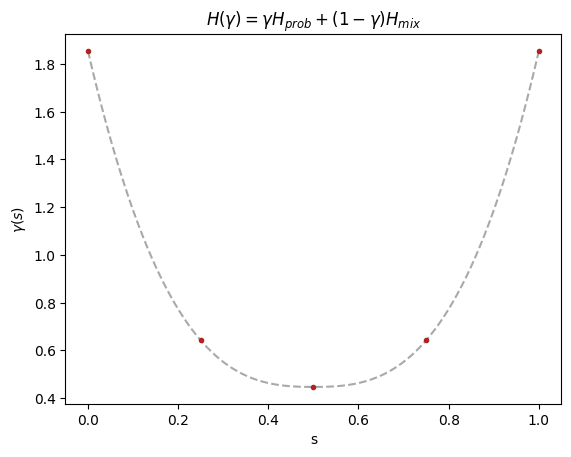

In [8]:
loss_opt = loss_ra(x1_opt, x2_opt, x3_opt)
print('Optimized spectral gap = ', -loss_opt.round(4))

schedule_opt = get_symmetric_schedule([x1_opt, x2_opt, x3_opt])
plot_schedule(schedule_opt, get_schedule_interpolator(schedule_opt, 'cubic')) 

In [9]:
ra_exp = {'n': n,
          'T': T,
          'interpolator_kind': interpolator_kind,
          't_max': t_max,
          'schedule_opt': schedule_opt.tolist(),
          'loss_opt': loss_opt,
          'first_optimizer': 'BO',
          'second_optimizer': 'None',
          'n_random_models': 1
          }

save_in_json(ra_exp, f'n{n}_{interpolator_kind}_BO.json')